In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

## Every-visit MC algo

In [3]:
def ev_mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    
    for i in range(num_episodes):
        observation = env.reset()
        episodes = list()
        while True:
            # On each step take action and save state with appropriate reward
            action = policy(observation)
            observation, reward, done, _ = env.step(action)
            episodes.append((observation, reward))
            if done:
                break
                
        reward = 0
        # Add discounted returns following all visited states
        for step, episode in enumerate(episodes[::-1]):
            observation = episode[0]
            reward += episode[1]
            returns_sum[observation] += reward
            returns_count[observation] += 1
            reward *= discount_factor

    # Calculate average reward at the state
    for observation in returns_sum:
        V[observation] = returns_sum[observation] / returns_count[observation]
    return V    

In [4]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

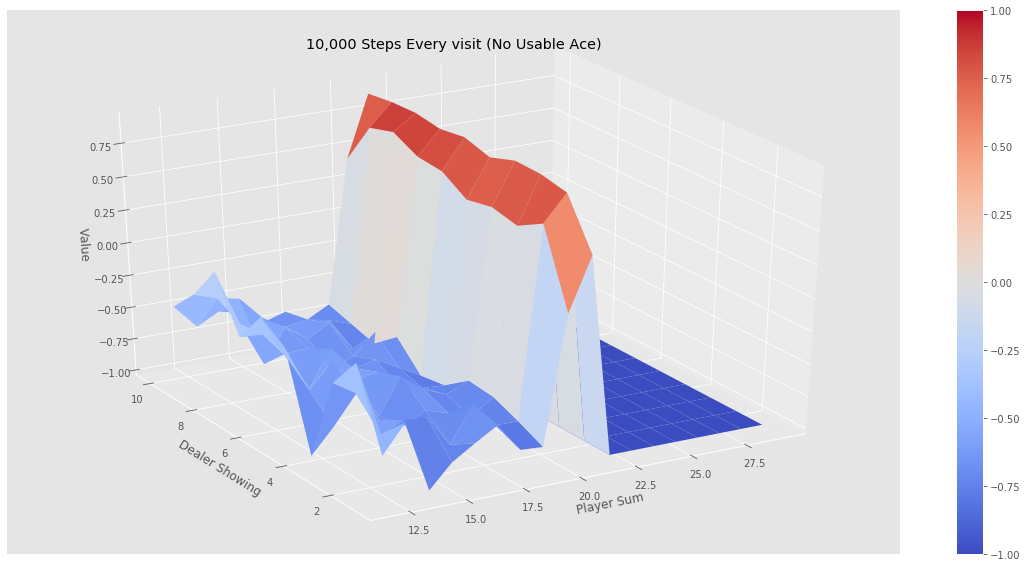

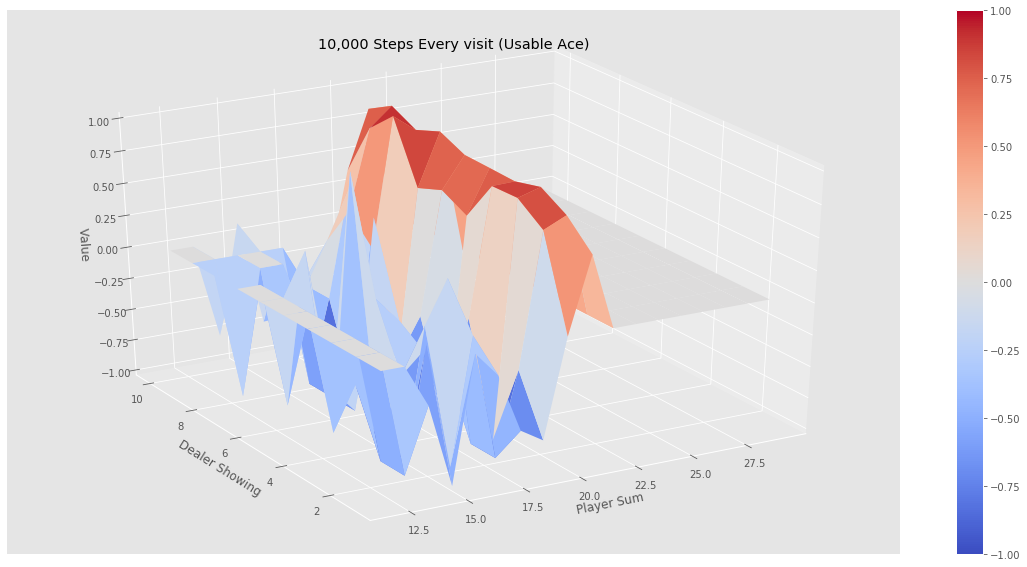

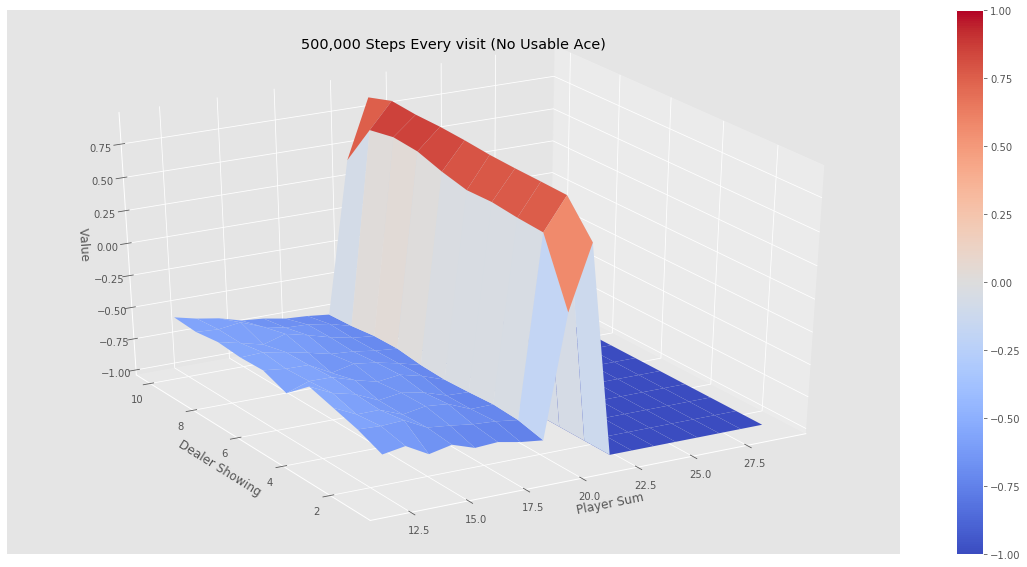

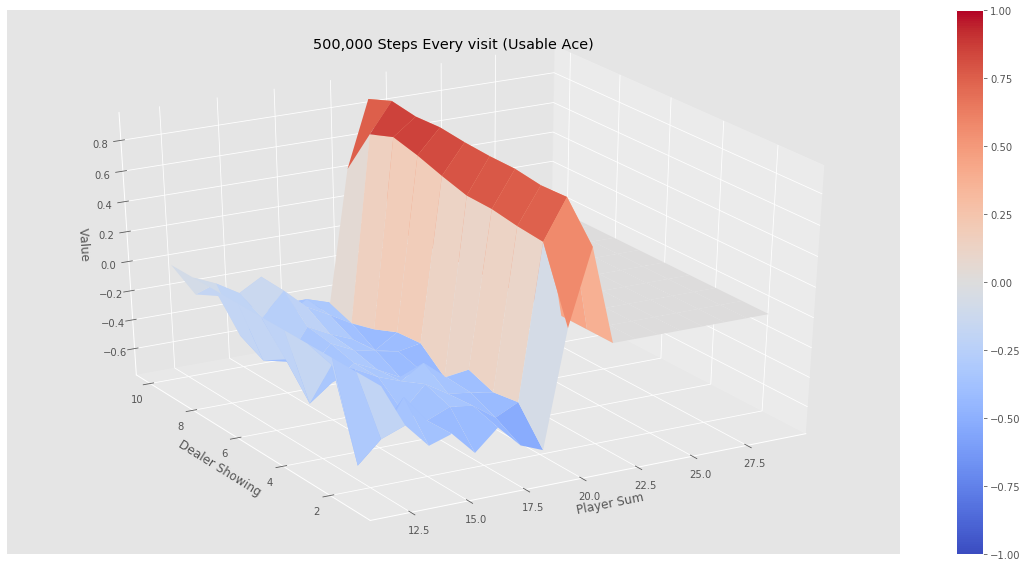

In [5]:
V_10k = ev_mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps Every visit")

V_500k = ev_mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps Every visit")

## First-visit MC algo

In [6]:
def fv_mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    
    for i in range(num_episodes):
        observation = env.reset()
        episodes = list()
        obs_count = defaultdict(int)
        while True:
            # On each step take action and save state with appropriate reward
            action = policy(observation)
            observation, reward, done, _ = env.step(action)
            episodes.append((observation, reward))
            # Count observation to determine first visit to the state
            obs_count[observation] += 1
            if done:
                break
        
        reward = 0
        # Add discounted returns following all visited states
        for step, episode in enumerate(episodes[::-1]):
            observation = episode[0]
            reward += episode[1]
            # If current observation was visited first time, add the return following it
            obs_count[observation] -= 1
            if obs_count[observation] == 0:
                returns_sum[observation] += reward
                returns_count[observation] += 1
            reward *= discount_factor
                    
    # Calculate average reward at the state
    for observation in returns_sum:
        V[observation] = returns_sum[observation] / returns_count[observation]
    return V    

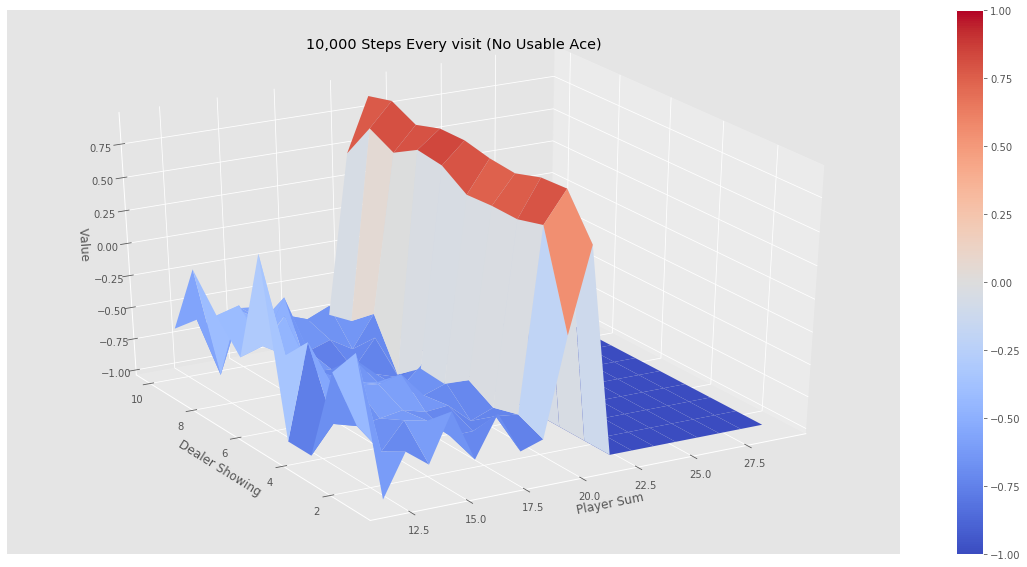

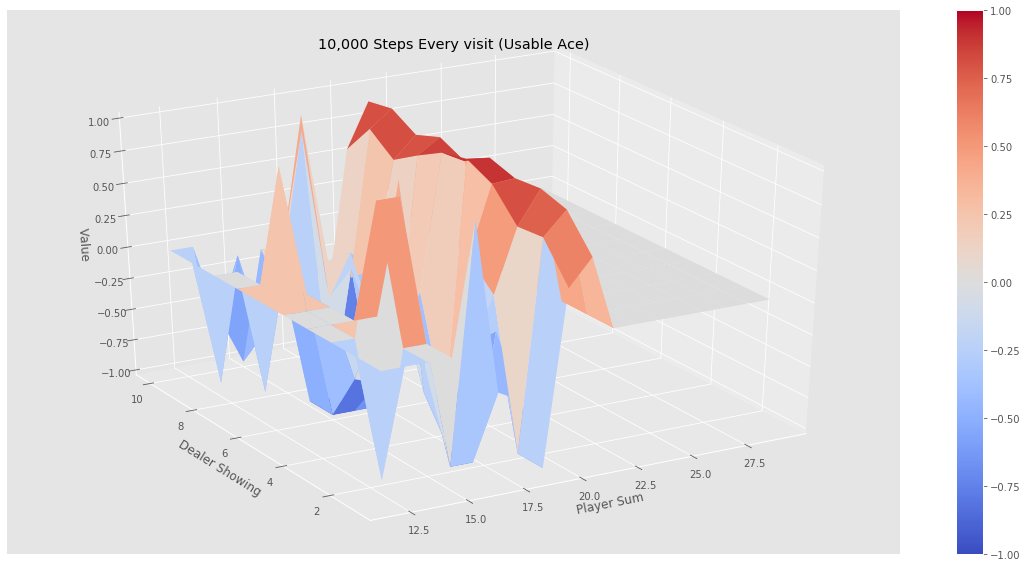

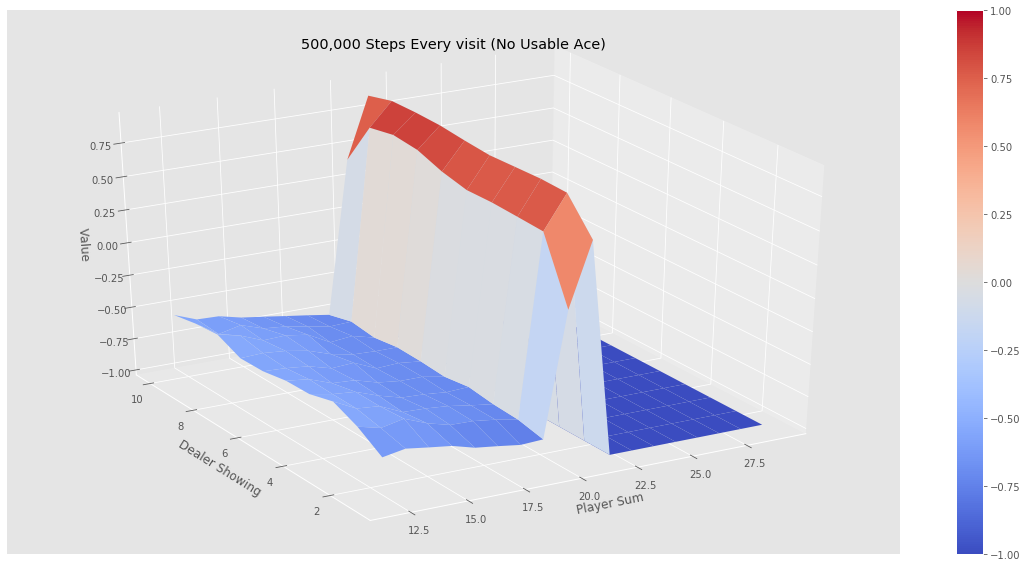

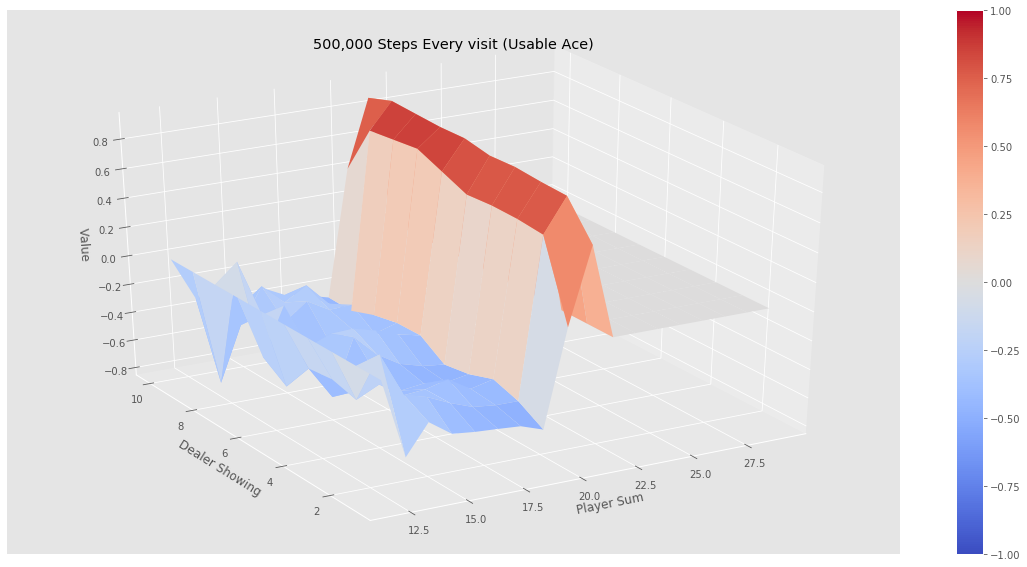

In [7]:
V_10k = fv_mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps Every visit")

V_500k = fv_mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps Every visit")